In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [149]:
covid_base_df = pd.read_csv("covid_base.txt", sep="\t", header=None)
covid_ds_df = pd.read_csv("covid_ds.txt", sep="\t", header=None)
covid_gpu_df = pd.read_csv("covid_gpu.txt", sep="\t", header=None)

In [150]:
covid_base_df.head()

,0,1
0,0.7500,801.455314
1,0.7600,795.490382
2,0.7925,800.686952
3,0.7400,801.952887
4,0.7475,802.256305


In [151]:
base_acc_arr = np.array(covid_base_df.iloc[:, 0])
base_time_arr = np.cumsum(np.array(covid_base_df.iloc[:, 1]))/3600

gpu_acc_arr = np.array(covid_gpu_df.iloc[:, 0])
gpu_time_arr = np.cumsum(np.array(covid_gpu_df.iloc[:, 1]))/3600

ds_acc_arr = np.array(covid_ds_df.iloc[:, 0])
ds_time_arr = (np.cumsum(np.array(covid_ds_df.iloc[:, 1]))+40)/3600

In [152]:
flower_acc_df = pd.read_csv("covid_flower_acc.txt").iloc[:, 1]

flower_acc_arr = []
for i in range(len(flower_acc_df)):
    cur_val = float(flower_acc_df[i][10:])
    flower_acc_arr.append(cur_val)

flower_acc_arr = flower_acc_arr[1:]

In [153]:
flower_time_df = pd.read_csv("covid_flower_time.txt").iloc[:, 0]

flower_time_arr = []
for i in range(len(flower_time_df)):
    cur_val = float(flower_time_df[i][5:])
    flower_time_arr.append(cur_val)

for i in range(1, len(flower_time_arr)):
    flower_time_arr[i] = flower_time_arr[i] - flower_time_arr[0]

flower_time_arr = np.array(flower_time_arr)/3600
flower_time_arr = flower_time_arr[1:]

# Let's also created a fitted line
flower_model = LinearRegression().fit(np.array(flower_time_arr).reshape(-1, 1), np.array(flower_acc_arr).reshape(-1, 1))
flower_fitted = flower_model.predict(flower_time_arr.reshape(-1, 1))

In [154]:
openfl_df = pd.read_csv("covid_openfl.txt", header=None)
openfl_time_arr = np.array(openfl_df.iloc[:,0])/3600
openfl_acc_arr = np.array(openfl_df.iloc[:,1])

In [155]:
# For baseline and data station, let's plot two points

max_base_ind = np.argmax(base_acc_arr)
max_ds_ind = np.argmax(ds_acc_arr)

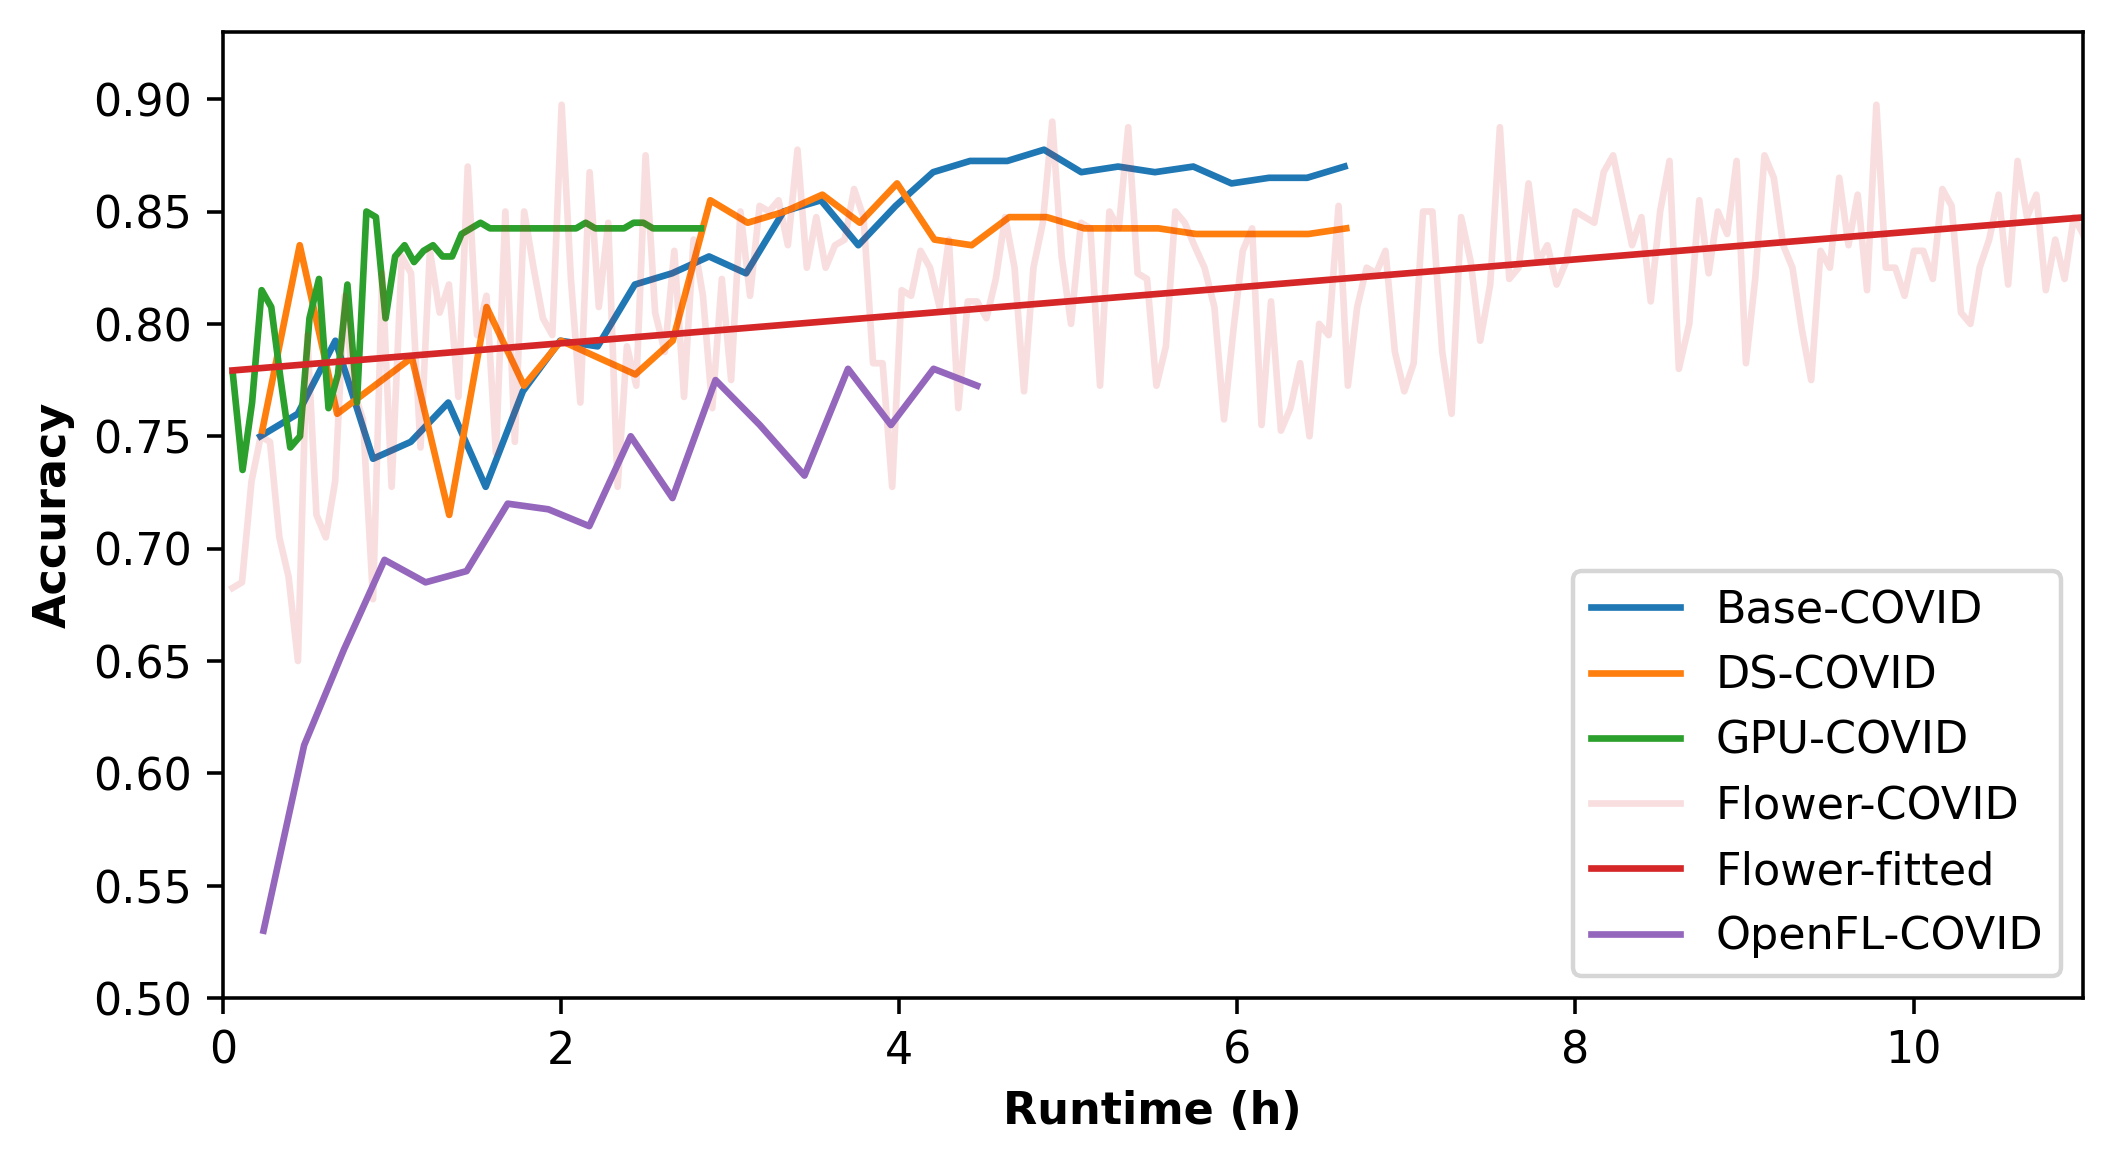

In [156]:
plt.figure(figsize=(7.5, 4), dpi=320)

# plt.plot(base_time_arr[max_base_ind],
#          base_acc_arr[max_base_ind],
#          marker='x',
#          markersize=10,
#          color="k",
#          linewidth=0,
#          label="Base-COVID")
# plt.plot(ds_time_arr[max_ds_ind],
#          ds_acc_arr[max_ds_ind],
#          marker='o',
#          markersize=10,
#          color="k",
#          linewidth=0,
#          label="DS-COVID")
plt.plot(base_time_arr,
         base_acc_arr,
         color="#1f77b4",
         label="Base-COVID",
         )
plt.plot(ds_time_arr,
         ds_acc_arr,
         color="#ff7f0e",
         label="DS-COVID",
         )
plt.plot(gpu_time_arr,
         gpu_acc_arr,
         color="#2ca02c",
         label="GPU-COVID",
         )
# Plotting flower and fitted line
plt.plot(flower_time_arr,
         flower_acc_arr,
         label="Flower-COVID",
         alpha = 0.15,
         color="#d62728",
         )
plt.plot(flower_time_arr,
         flower_fitted,
         label="Flower-fitted",
         color="#d62728",
         )

# Plotting openFL
plt.plot(openfl_time_arr,
         openfl_acc_arr,
         label="OpenFL-COVID",
         color="#9467bd",
         )
plt.xlim([0, 11])
plt.ylim([0.5, 0.93])
plt.xlabel("Runtime (h)", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend(loc=4)
plt.savefig("covid_8.pdf",
            facecolor="w",
            bbox_inches='tight',)